In [1]:
# Packages Import
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
salary = pd.read_csv('salary_data.csv')

In [3]:
X = salary[['YearsExperience']]
y = salary[['Salary']]

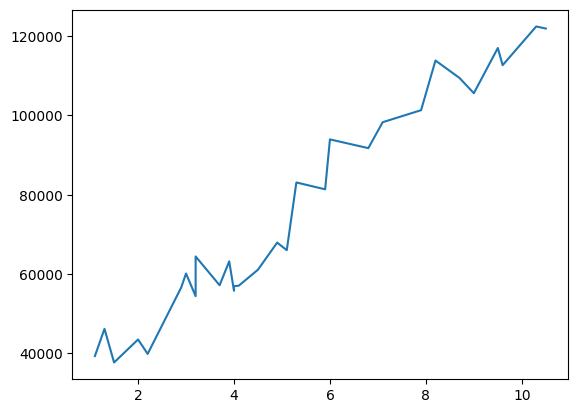

In [4]:
plt.plot(X,y)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
model_LR = LinearRegression()
model_Log = LogisticRegression(max_iter=10000, random_state=42)
model_DT = DecisionTreeRegressor()
model_RF = RandomForestRegressor(n_estimators=100,random_state=42)
model_XG = XGBRegressor()

In [8]:
# Model Training
model_LR.fit(X_train,y_train)

LinearRegression()

In [9]:
model_Log.fit(X_train,y_train)

c:\Users\229147\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, random_state=42)

In [10]:
model_DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [11]:
model_RF.fit(X_train,y_train)

c:\Users\229147\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [12]:
model_XG.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [13]:
# Model Prediction with different models
y_pred_LR = model_LR.predict(X_test)
y_pred_Log = model_Log.predict(X_test)
y_pred_DT = model_DT.predict(X_test)
y_pred_RF = model_RF.predict(X_test)
y_pred_XG = model_XG.predict(X_test)

In [14]:
# Model Evaluation
MAE_LR = mean_absolute_error(y_test,y_pred_LR)
MAE_Log = mean_absolute_error(y_test,y_pred_Log)
MAE_DT = mean_absolute_error(y_test,y_pred_DT)
MAE_RF = mean_absolute_error(y_test,y_pred_RF)
MAE_XG = mean_absolute_error(y_test,y_pred_XG)
MAPE_LR = mean_absolute_percentage_error(y_test,y_pred_LR)
MAPE_Log = mean_absolute_percentage_error(y_test,y_pred_Log)
MAPE_DT = mean_absolute_percentage_error(y_test,y_pred_DT)
MAPE_RF = mean_absolute_percentage_error(y_test,y_pred_RF)
MAPE_XG = mean_absolute_percentage_error(y_test,y_pred_XG)
MSE_LR = mean_squared_error(y_test,y_pred_LR)
MSE_Log = mean_squared_error(y_test,y_pred_Log)
MSE_DT = mean_squared_error(y_test,y_pred_DT)
MSE_RF = mean_squared_error(y_test,y_pred_RF)
MSE_XG = mean_squared_error(y_test,y_pred_XG)
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_pred_LR))
RMSE_Log = np.sqrt(mean_squared_error(y_test,y_pred_Log))
RMSE_DT = np.sqrt(mean_squared_error(y_test,y_pred_DT))
RMSE_RF = np.sqrt(mean_squared_error(y_test,y_pred_RF))
RMSE_XG = np.sqrt(mean_squared_error(y_test,y_pred_XG))
r2_LR = r2_score(y_test,y_pred_LR)
adjusted_r2_LR = 1-(1-r2_LR)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
r2_Log = r2_score(y_test,y_pred_Log)
adjusted_r2_Log = 1-(1-r2_Log)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
r2_DT = r2_score(y_test,y_pred_DT)
adjusted_r2_DT = 1-(1-r2_DT)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
r2_RF = r2_score(y_test,y_pred_RF)
adjusted_r2_RF = 1-(1-r2_RF)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
r2_XG = r2_score(y_test,y_pred_XG)
adjusted_r2_XG = 1-(1-r2_XG)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
MSE = [MSE_LR,MSE_Log,MSE_DT,MSE_RF,MSE_XG]
MAE = [MAE_LR,MAE_Log,MAE_DT,MAE_RF,MAE_XG]
RMSE = [RMSE_LR,RMSE_Log,RMSE_DT,RMSE_RF,RMSE_XG]
r2 = [r2_LR,r2_Log,r2_DT,r2_RF,r2_XG]
adjusted_r2 = [adjusted_r2_LR,adjusted_r2_Log,adjusted_r2_DT,adjusted_r2_RF,adjusted_r2_XG]
evaluation_output = pd.DataFrame({'MSE':MSE,"MAE":MAE,"RMSE":RMSE,"r2":r2,"adjusted_r2":adjusted_r2})
evaluation_output['Model Name'] = ['Linear Regression',"Logistic Regression",'Decision Tree','Random Forest','XGBoost']

In [15]:
# Comparison of different model's evaluation numbers
evaluation_output

,MSE,MAE,RMSE,r2,adjusted_r2,Model Name
0,3.880259e+07,5056.995467,6229.172416,0.934721,0.923841,Linear Regression
1,1.695094e+08,10677.250000,13019.576625,0.714828,0.667300,Logistic Regression
2,7.767130e+07,7026.125000,8813.132396,0.869331,0.847553,Decision Tree
3,5.005268e+07,6065.763265,7074.791526,0.915795,0.901760,Random Forest
4,8.948846e+07,8378.117188,9459.833825,0.849450,0.824359,XGBoost


In [16]:
pickle.dump(model_LR,open('model.pkl','wb'))